In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
path = "data/"
os.listdir(path)

['log-2021-06-29-23-05-51.csv',
 'log-2021-06-30-04-56-49.csv',
 'cluster-2021-06-29-23-05-51.csv',
 'cluster-2021-06-30-04-56-49.csv']

In [3]:
clu_info = pd.read_csv(os.path.join(path,"cluster-2021-06-30-04-56-49.csv"), index_col=0)
time = clu_info.index.to_list()
nodes = clu_info.columns.to_list()

In [4]:
def cluster_resource_data(cluster_info):
    def split_resource(x):
        arr = x.split(',')
        return float(arr[0]), float(arr[1])
    nodes = clu_info.columns.to_list()
    res_map = dict()
    for node in nodes:
        k8s_master_data = clu_info[node].to_list()
        a = map(split_resource, k8s_master_data)
        cpu_list = []
        mem_list = [] 
        for item in a:
            cpu_list.append(item[0])
            mem_list.append(item[1])
        res_map[node] = (cpu_list, mem_list)
    return res_map
    

In [5]:
data = cluster_resource_data(clu_info)
nodes = data.keys()

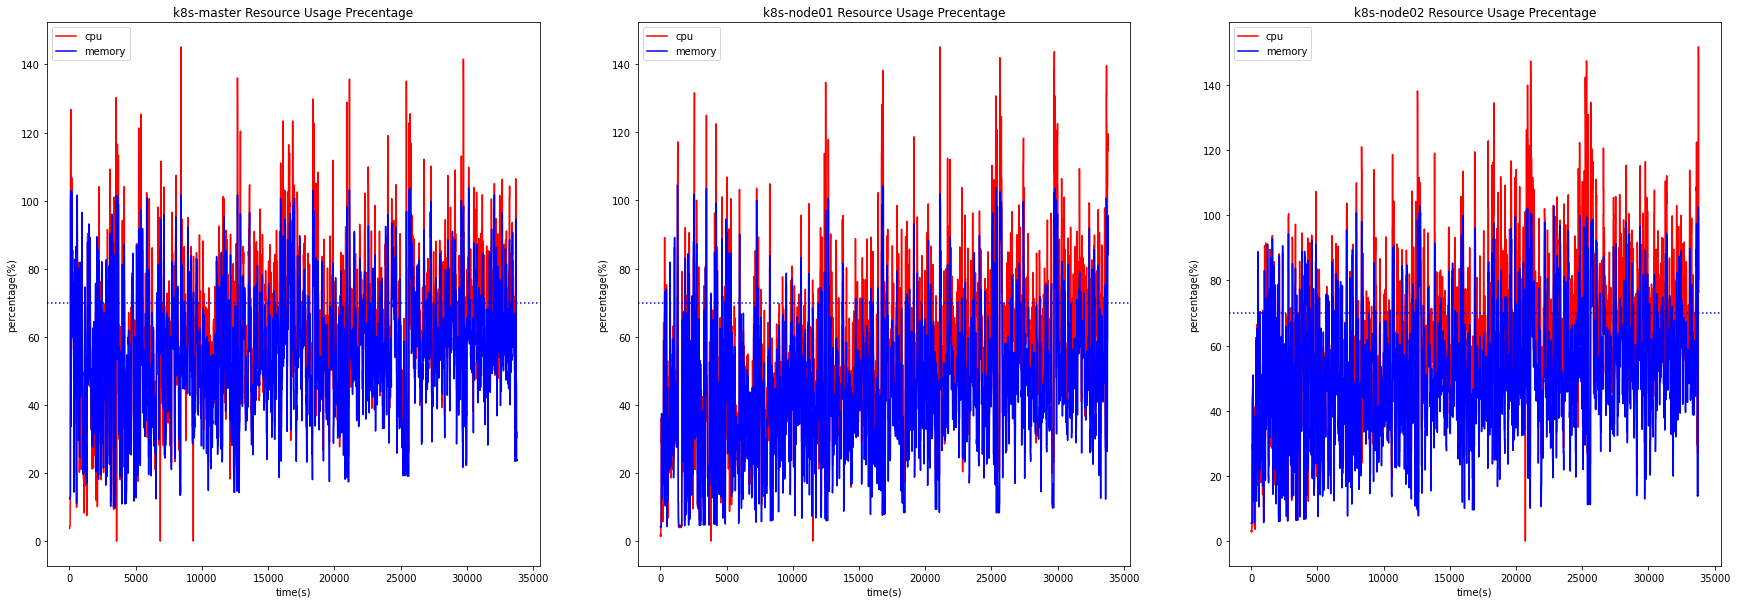

In [6]:
fig,ax=plt.subplots(1,len(nodes), figsize=(30, 10))
# fig2,ax2=plt.subplots(1,1)
color = ['r-', 'g-', 'b-']
for i, node in enumerate(nodes):
    ax[i].plot(time, data[node][0], 'r-', label="cpu")
    ax[i].plot(time, data[node][1], 'b', label="memory")
    ax[i].axhline(y=70,ls=":",c="blue")
    ax[i].set_title(node + " Resource Usage Precentage")
    ax[i].set_xlabel('time(s)')
    ax[i].set_ylabel('percentage(%)')
    ax[i].legend()
#     ax2.plot(time, data[node][0], color[i], label=node)
# ax.imshow()
plt.savefig("resource percentage.png")
# ax2.set_title("nodes cpu load")
# ax2.legend()



In [7]:
path = "data/"
os.listdir(path)

['log-2021-06-29-23-05-51.csv',
 'log-2021-06-30-04-56-49.csv',
 'cluster-2021-06-29-23-05-51.csv',
 'cluster-2021-06-30-04-56-49.csv']

In [8]:
clu_info = pd.read_csv(os.path.join(path,"log-2021-06-30-04-56-49.csv"), index_col=0)

In [9]:
rewards = list(np.ravel(clu_info.iloc[:, 1:3].values.tolist()))

In [10]:
time = clu_info.index.to_list()

No handles with labels found to put in legend.


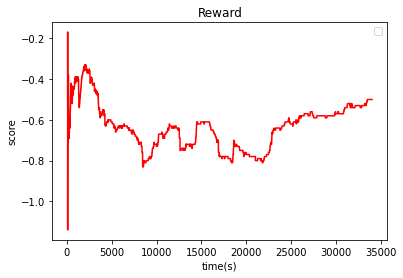

In [11]:
fig,ax=plt.subplots(1,1)
ax.plot(time, rewards, 'r-')
ax.set_title("Reward")
ax.set_xlabel('time(s)')
ax.set_ylabel('score')
ax.legend()
plt.savefig("reward.png")

In [12]:
import re
find_float = lambda x: re.search("\d+(\.\d+)?",x).group()
loss_path = "loss.txt"
cnt = 0
loss = []
cnt_list = []

In [13]:
with open(loss_path) as f:
    lines = f.readlines()
    for line in lines:
        cnt += 1
        val = float(find_float(line))
        cnt_list.append(cnt)
#         print(val)
        if val > 10:
            print(cnt)
        loss.append(val)
#     print(loss)

FileNotFoundError: [Errno 2] No such file or directory: 'loss.txt'

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(cnt_list,loss, 'b-')
ax.set_title("loss")
ax.set_xlabel('time(s)')
ax.set_ylabel('score')
# ax.legend()
# plt.savefig("reward.png")